In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [146]:
df_X_raw = pd.read_excel('masbasis_spectral_complete.xlsx')

In [147]:
df_X_raw['date'] = pd.to_datetime(df_X_raw['date'])
df_X_raw.iloc[10000:10005,2:]

location  plot_number plot_type camera  line_number  masbasis2015  \
10000  vollebekk       1162.0     yield   mica       1624.0        1624.0   
10001  vollebekk       1162.0     yield   mica       1624.0        1624.0   
10002  vollebekk       1162.0     yield   mica       1624.0        1624.0   
10003  vollebekk       1162.0     yield   mica       1624.0        1624.0   
10004  vollebekk       1162.0     yield   mica       1624.0        1624.0   

          line  rep  block  column  ...  blue_median green_median  red_median  \
10000  GN14515  1.0    9.0    62.0  ...     0.016666     0.041038    0.021821   
10001  GN14515  1.0    9.0    62.0  ...     0.003375     0.007734    0.004212   
10002  GN14515  1.0    9.0    62.0  ...     0.019329     0.050943    0.029267   
10003  GN14515  1.0    9.0    62.0  ...     0.023749     0.066180    0.042014   
10004  GN14515  1.0    9.0    62.0  ...     0.026614     0.070786    0.067438   

       rededge_median  nir_median  blue_mean  green_mean  red_mean  \
10000        0.107767    0.417709        NaN         NaN       NaN   
10001        0.019883    0.078168        NaN         NaN       NaN   
10002        0.112232    0.349410        NaN         NaN       NaN   
10003        0.141552    0.347312        NaN         NaN       NaN   
10004        0.166831    0.296682        NaN         NaN       NaN   

       rededge_mean  nir_mean  
10000           NaN       NaN  
10001           NaN       NaN  
10002           NaN       NaN  
10003           NaN       NaN  
10004           NaN       NaN  

[5 rows x 22 columns]

In [148]:
df_X_raw.shape

(57264, 24)

In [149]:
df_X1 = df_X_raw[['env','season','location','plot_number','plot_type','camera','lodging','date','blue_median','green_median','red_median','rededge_median','nir_median']]
df_X1.shape

(57264, 13)

In [150]:
df_ = df_X1.copy()

In [151]:
df_['date'] = pd.to_datetime(df_['date'])

In [152]:
#Remove Lodged Plots
df_X = df_.loc[(df_X1['lodging'] == False) & (df_X1['plot_type'] == 'yield') & (df_X1['location'] == 'vollebekk') ]
df_X.shape
df_X.set_index('plot_number', inplace=True)

In [153]:
df_X.isna().sum().sum()

576

In [154]:
df_X_2019 = df_X.loc[df_X['season'] == 2019]

df_X_2019.shape

(3080, 12)

In [155]:
df_X_2020 = df_X.loc[(df_X['season'] == 2020)]

df_X_2020.shape

(6048, 12)

In [156]:
df_X_2020.head()

env  season   location plot_type camera  lodging  \
plot_number                                                                
1105.0       2020_vollebekk    2020  vollebekk     yield   mica    False   
1105.0       2020_vollebekk    2020  vollebekk     yield   mica    False   
1105.0       2020_vollebekk    2020  vollebekk     yield   mica    False   
1105.0       2020_vollebekk    2020  vollebekk     yield   mica    False   
1105.0       2020_vollebekk    2020  vollebekk     yield   mica    False   

                  date  blue_median  green_median  red_median  rededge_median  \
plot_number                                                                     
1105.0      2020-06-18     0.015137      0.037526    0.014911        0.109639   
1105.0      2020-06-24     0.014972      0.034236    0.016068        0.094503   
1105.0      2020-06-26     0.012624      0.027086    0.015051        0.075851   
1105.0      2020-07-01     0.017417      0.043442    0.020844        0.107552   
1105.0      2020-07-08     0.022297      0.048837    0.020287        0.114728   

             nir_median  
plot_number              
1105.0         0.431767  
1105.0         0.391461  
1105.0         0.435237  
1105.0         0.433779  
1105.0         0.444705

## Data Resampling and Interpolation

In [157]:
from scipy.interpolate import CubicSpline

In [158]:
df_20X = df_X_2020[['date','blue_median','green_median','red_median','rededge_median','nir_median']]
df_20X.reset_index(inplace=True)

In [164]:
freq = '5D'

df_20res = pd.DataFrame()

for plot_num in df_20X['plot_number'].unique():
    
    data = df_20X.loc[df_20X['plot_number'] == plot_num]
    data.set_index('date', inplace = True)
    data_res = data.resample(freq).mean().reset_index()
    data_res['plot_number'] = plot_num
    
    df_20res = pd.concat([df_20res, data_res], ignore_index=False)

df_20res.set_index('plot_number', inplace=True)

In [165]:
df_20res.shape

(6048, 6)

In [166]:
df_20res.head(14)

date  blue_median  green_median  red_median  rededge_median  \
plot_number                                                                     
1105.0      2020-06-18     0.015137      0.037526    0.014911        0.109639   
1105.0      2020-06-23     0.013798      0.030661    0.015559        0.085177   
1105.0      2020-06-28     0.017417      0.043442    0.020844        0.107552   
1105.0      2020-07-03          NaN           NaN         NaN             NaN   
1105.0      2020-07-08     0.022297      0.048837    0.020287        0.114728   
1105.0      2020-07-13     0.011046      0.031304    0.016580        0.070497   
1105.0      2020-07-18     0.022397      0.060377    0.048461        0.138072   
1105.0      2020-07-23          NaN           NaN         NaN             NaN   
1105.0      2020-07-28     0.027139      0.075271    0.070734        0.173504   
1105.0      2020-08-02          NaN           NaN         NaN             NaN   
1105.0      2020-08-07     0.031707      0.071970    0.110121        0.155774   
1105.0      2020-08-12     0.042600      0.077703    0.126265        0.151689   
1106.0      2020-06-18     0.013736      0.036581    0.013466        0.110889   
1106.0      2020-06-23     0.013585      0.031790    0.015338        0.087899   

             nir_median  
plot_number              
1105.0         0.431767  
1105.0         0.413349  
1105.0         0.433779  
1105.0              NaN  
1105.0         0.444705  
1105.0         0.232059  
1105.0         0.290974  
1105.0              NaN  
1105.0         0.311046  
1105.0              NaN  
1105.0         0.253116  
1105.0         0.252579  
1106.0         0.448822  
1106.0         0.414929

In [167]:
for column in df_20res.columns:
    if (column != 'date'):
        mask = df_20res[column].isnull()  # Create a mask for missing values
        x = np.arange(len(df_20res))
        y = df_20res[column].values

        # Create a cubic spline interpolation function
        spline = CubicSpline(x[~mask], y[~mask])

        # Fill missing values with interpolated values
        df_20res.loc[mask, column] = spline(x[mask])


In [169]:
#df_20res = df_20res.fillna(df_20res.median(axis=0))
df_20res.head(14)

date  blue_median  green_median  red_median  rededge_median  \
plot_number                                                                     
1105.0      2020-06-18     0.015137      0.037526    0.014911        0.109639   
1105.0      2020-06-23     0.013798      0.030661    0.015559        0.085177   
1105.0      2020-06-28     0.017417      0.043442    0.020844        0.107552   
1105.0      2020-07-03     0.024159      0.055160    0.024431        0.131636   
1105.0      2020-07-08     0.022297      0.048837    0.020287        0.114728   
1105.0      2020-07-13     0.011046      0.031304    0.016580        0.070497   
1105.0      2020-07-18     0.022397      0.060377    0.048461        0.138072   
1105.0      2020-07-23     0.029142      0.077585    0.066680        0.177520   
1105.0      2020-07-28     0.027139      0.075271    0.070734        0.173504   
1105.0      2020-08-02     0.024164      0.068506    0.079378        0.161215   
1105.0      2020-08-07     0.031707      0.071970    0.110121        0.155774   
1105.0      2020-08-12     0.042600      0.077703    0.126265        0.151689   
1106.0      2020-06-18     0.013736      0.036581    0.013466        0.110889   
1106.0      2020-06-23     0.013585      0.031790    0.015338        0.087899   

             nir_median  
plot_number              
1105.0         0.431767  
1105.0         0.413349  
1105.0         0.433779  
1105.0         0.500632  
1105.0         0.444705  
1105.0         0.232059  
1105.0         0.290974  
1105.0         0.331992  
1105.0         0.311046  
1105.0         0.289961  
1105.0         0.253116  
1105.0         0.252579  
1106.0         0.448822  
1106.0         0.414929

In [170]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import seaborn as sns

In [171]:
df20vals = df_20res.iloc[:,-5:]

for col in df20vals.columns:
    data = df20vals[col].values.reshape(-1,1)
    result = adfuller(data)
    
    #print(f"ADF Statistics for {col}: {result[0]}")
    print(f"p-value for {col}: {result[1]}")
    #print('Critical Values:', result[4])

p-value for blue_median: 5.002215085193975e-12
p-value for green_median: 2.3240879759245744e-15
p-value for red_median: 1.3880939329816815e-10
p-value for rededge_median: 3.4970355850164568e-16
p-value for nir_median: 1.9332601943675917e-10


In [177]:
start_date = '2023-06-18'
end_date = '2023-08-12'
freq = '5D'
date_range = pd.date_range(start=start_date, end=end_date, freq=freq)

## Removing Outliers from each year using IQR Percentile
Before removing the trend, we remove the outliers to possibly see an improvement in the model's accuracy

In [178]:
df_20 = df_20res.copy()
df_20 = df_20.sort_values('date')
df_20 = df_20.groupby('plot_number').apply(lambda x: x.iloc[2:]).reset_index(level=1, drop=True)

In [179]:
df_20grouped = df_20.groupby('plot_number')
df_20long = df_20.copy()
df_20long['obs_num'] = df_20grouped.cumcount() + 1

In [180]:
df_20long.head(12)

date  blue_median  green_median  red_median  rededge_median  \
plot_number                                                                     
1105.0      2020-06-28     0.017417      0.043442    0.020844        0.107552   
1105.0      2020-07-03     0.024159      0.055160    0.024431        0.131636   
1105.0      2020-07-08     0.022297      0.048837    0.020287        0.114728   
1105.0      2020-07-13     0.011046      0.031304    0.016580        0.070497   
1105.0      2020-07-18     0.022397      0.060377    0.048461        0.138072   
1105.0      2020-07-23     0.029142      0.077585    0.066680        0.177520   
1105.0      2020-07-28     0.027139      0.075271    0.070734        0.173504   
1105.0      2020-08-02     0.024164      0.068506    0.079378        0.161215   
1105.0      2020-08-07     0.031707      0.071970    0.110121        0.155774   
1105.0      2020-08-12     0.042600      0.077703    0.126265        0.151689   
1106.0      2020-06-28     0.016551      0.042120    0.019487        0.107700   
1106.0      2020-07-03     0.021390      0.049889    0.020438        0.128260   

             nir_median  obs_num  
plot_number                       
1105.0         0.433779        1  
1105.0         0.500632        2  
1105.0         0.444705        3  
1105.0         0.232059        4  
1105.0         0.290974        5  
1105.0         0.331992        6  
1105.0         0.311046        7  
1105.0         0.289961        8  
1105.0         0.253116        9  
1105.0         0.252579       10  
1106.0         0.463768        1  
1106.0         0.555080        2

In [181]:
df_20pivot = df_20long.pivot_table(index='plot_number', columns='obs_num', values=['blue_median','green_median','red_median','rededge_median','nir_median'], aggfunc='mean')
df_20pivot

blue_median                                                    \
obs_num              1         2         3         4         5         6    
plot_number                                                                 
1105.0         0.017417  0.024159  0.022297  0.011046  0.022397  0.029142   
1106.0         0.016551  0.021390  0.019382  0.009555  0.023445  0.027993   
1108.0         0.017557  0.020047  0.016599  0.010219  0.024680  0.031687   
1109.0         0.018464  0.022135  0.019057  0.011995  0.028153  0.034959   
1110.0         0.014360  0.016227  0.014689  0.009805  0.027209  0.032365   
...                 ...       ...       ...       ...       ...       ...   
1878.0         0.017929  0.022204  0.018173  0.011216  0.047829  0.049012   
1879.0         0.016944  0.022300  0.018800  0.011347  0.049033  0.055386   
1880.0         0.017671  0.023194  0.018717  0.010951  0.046854  0.047009   
1881.0         0.016077  0.021689  0.018419  0.010978  0.045984  0.056090   
1882.0         0.017935  0.022858  0.019427  0.011553  0.047428  0.050403   

                                                     ... rededge_median  \
obs_num            7         8         9         10  ...             1    
plot_number                                          ...                  
1105.0       0.027139  0.024164  0.031707  0.042600  ...       0.107552   
1106.0       0.024313  0.025539  0.035494  0.041878  ...       0.107700   
1108.0       0.028857  0.025150  0.030777  0.039861  ...       0.101530   
1109.0       0.029564  0.023003  0.031172  0.047361  ...       0.111571   
1110.0       0.026652  0.023910  0.030340  0.037139  ...       0.103380   
...               ...       ...       ...       ...  ...            ...   
1878.0       0.028031  0.022663  0.031074  0.035407  ...       0.110245   
1879.0       0.041013  0.039936  0.047504  0.045170  ...       0.100255   
1880.0       0.025922  0.022087  0.030353  0.032876  ...       0.105103   
1881.0       0.050292  0.056861  0.063814  0.049098  ...       0.098148   
1882.0       0.032484  0.029204  0.036369  0.039855  ...       0.101564   

                                                                         \
obs_num            2         3         4         5         6         7    
plot_number                                                               
1105.0       0.131636  0.114728  0.070497  0.138072  0.177520  0.173504   
1106.0       0.128260  0.107534  0.063179  0.133272  0.163817  0.161318   
1108.0       0.122705  0.104771  0.063426  0.156457  0.203933  0.195674   
1109.0       0.140801  0.124814  0.076021  0.154559  0.197366  0.186929   
1110.0       0.125798  0.110801  0.071532  0.148859  0.207913  0.217904   
...               ...       ...       ...       ...       ...       ...   
1878.0       0.136096  0.112525  0.070473  0.212552  0.243243  0.185349   
1879.0       0.134212  0.118384  0.071283  0.206724  0.260137  0.234285   
1880.0       0.141638  0.119787  0.066310  0.191535  0.218317  0.168926   
1881.0       0.135390  0.116819  0.065637  0.200495  0.268069  0.264177   
1882.0       0.133395  0.118961  0.068520  0.184919  0.240573  0.221625   

                                           
obs_num            8         9         10  
plot_number                                
1105.0       0.161215  0.155774  0.151689  
1106.0       0.178479  0.188771  0.155710  
1108.0       0.182954  0.174341  0.158242  
1109.0       0.165611  0.156420  0.158969  
1110.0       0.198624  0.172742  0.148541  
...               ...       ...       ...  
1878.0       0.155643  0.151129  0.141248  
1879.0       0.217017  0.199478  0.162057  
1880.0       0.152347  0.151237  0.135903  
1881.0       0.264033  0.244711  0.174751  
1882.0       0.192906  0.168244  0.148720  

[504 rows x 50 columns]

## IQR for Outlier Detection

In [192]:
q1 = np.percentile(df_20pivot, 20, axis=0)
q3 = np.percentile(df_20pivot, 80, axis=0)
iqr = q3 - q1

In [193]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [194]:
outliers = np.logical_or(df_20pivot < lower_bound, df_20pivot > upper_bound)
df_20clean = df_20pivot[~outliers.any(axis=1)]

In [195]:
df_20clean.shape
#Original Shape was (504, 50)

(422, 50)

#### Converting to Long Format again for Differencing

In [196]:
df_20pivotc = df_20clean.copy()
df_20pivotc.columns = [('X'.join(map(str, col))) for col in df_20pivot.columns.values]
df_20wide = df_20pivotc.reset_index()
df_20long = pd.melt(df_20wide, id_vars='plot_number', var_name='feature', value_name='value')
df_20long[['color','time_step']] = df_20long['feature'].str.split('X', expand=True)
df_20long = df_20long.drop('feature', axis=1)
df_20long = df_20long.set_index(['plot_number', 'time_step', 'color'])

df_20wide_new = df_20long.unstack(level=-1)
df_20w = df_20wide_new.reset_index()

df_20w.columns = [' '.join(map(str, col)).replace('_','_') for col in df_20w.columns.values]
df_20w.columns.name = None

df_20w['time_step '] = df_20w['time_step '].astype(int)
df_20ws = df_20w.sort_values(by=['plot_number ','time_step '])

df_20long = df_20ws.set_index('plot_number ')
df_20long.shape

(4220, 6)

##### Rest of the years are resampled as well before removing outliers

In [197]:
df_X_2021all = df_X.loc[(df_X['season'] == 2021)]

df_X_2021all.shape

(17280, 12)

In [198]:
df_X_2021 = df_X.loc[(df_X['season'] == 2021) & (df_X['camera'] == 'p4m')]

df_X_2021.shape

(12672, 12)

In [202]:
df_21X = df_X_2021[['date','blue_median','green_median','red_median','rededge_median','nir_median']]
df_21X.reset_index(inplace=True)

freq = '5D'

df_21res = pd.DataFrame()

for plot_num in df_21X['plot_number'].unique():
    
    data = df_21X.loc[df_21X['plot_number'] == plot_num]
    data.set_index('date', inplace = True)
    data_res = data.resample(freq).mean().reset_index()
    data_res['plot_number'] = plot_num
    
    df_21res = pd.concat([df_21res, data_res], ignore_index=False)

df_21res.set_index('plot_number', inplace=True)
df_21res.head(14)

date  blue_median  green_median  red_median  rededge_median  \
plot_number                                                                     
1107.0      2021-05-28     0.028882      0.054156    0.047303        0.131320   
1107.0      2021-06-02     0.034943      0.068537    0.043628        0.218689   
1107.0      2021-06-07     0.021654      0.040966    0.016993        0.195721   
1107.0      2021-06-12     0.020683      0.038784    0.017404        0.183363   
1107.0      2021-06-17     0.020992      0.038800    0.019219        0.180083   
1107.0      2021-06-22     0.028040      0.043941    0.021129        0.204807   
1107.0      2021-06-27     0.023153      0.044406    0.023317        0.199550   
1107.0      2021-07-02     0.017541      0.032946    0.017737        0.143223   
1107.0      2021-07-07     0.000745      0.000929    0.000531        0.003213   
1107.0      2021-07-12     0.024014      0.040452    0.024070        0.165522   
1107.0      2021-07-17     0.019414      0.043275    0.032266        0.152824   
1107.0      2021-07-22     0.025865      0.056129    0.063722        0.163698   
1107.0      2021-07-27     0.022912      0.043842    0.062572        0.108220   
1107.0      2021-08-01     0.025790      0.054915    0.082208        0.126600   

             nir_median  
plot_number              
1107.0         0.162979  
1107.0         0.324878  
1107.0         0.367871  
1107.0         0.355694  
1107.0         0.353080  
1107.0         0.407503  
1107.0         0.417437  
1107.0         0.293700  
1107.0         0.006465  
1107.0         0.303355  
1107.0         0.255472  
1107.0         0.232042  
1107.0         0.138038  
1107.0         0.161584

In [203]:

for column in df_21res.columns:
    if (column != 'date'):
        mask = df_21res[column].isnull()  # Create a mask for missing values
        x = np.arange(len(df_21res))
        y = df_21res[column].values

        # Create a cubic spline interpolation function
        spline = CubicSpline(x[~mask], y[~mask])

        # Fill missing values with interpolated values
        df_21res.loc[mask, column] = spline(x[mask])


#df_21res = df_21res.fillna(df_20res.median(axis=0))
df_21res.head(14)

date  blue_median  green_median  red_median  rededge_median  \
plot_number                                                                     
1107.0      2021-05-28     0.028882      0.054156    0.047303        0.131320   
1107.0      2021-06-02     0.034943      0.068537    0.043628        0.218689   
1107.0      2021-06-07     0.021654      0.040966    0.016993        0.195721   
1107.0      2021-06-12     0.020683      0.038784    0.017404        0.183363   
1107.0      2021-06-17     0.020992      0.038800    0.019219        0.180083   
1107.0      2021-06-22     0.028040      0.043941    0.021129        0.204807   
1107.0      2021-06-27     0.023153      0.044406    0.023317        0.199550   
1107.0      2021-07-02     0.017541      0.032946    0.017737        0.143223   
1107.0      2021-07-07     0.000745      0.000929    0.000531        0.003213   
1107.0      2021-07-12     0.024014      0.040452    0.024070        0.165522   
1107.0      2021-07-17     0.019414      0.043275    0.032266        0.152824   
1107.0      2021-07-22     0.025865      0.056129    0.063722        0.163698   
1107.0      2021-07-27     0.022912      0.043842    0.062572        0.108220   
1107.0      2021-08-01     0.025790      0.054915    0.082208        0.126600   

             nir_median  
plot_number              
1107.0         0.162979  
1107.0         0.324878  
1107.0         0.367871  
1107.0         0.355694  
1107.0         0.353080  
1107.0         0.407503  
1107.0         0.417437  
1107.0         0.293700  
1107.0         0.006465  
1107.0         0.303355  
1107.0         0.255472  
1107.0         0.232042  
1107.0         0.138038  
1107.0         0.161584

In [204]:
df_21res.head()

date  blue_median  green_median  red_median  rededge_median  \
plot_number                                                                     
1107.0      2021-05-28     0.028882      0.054156    0.047303        0.131320   
1107.0      2021-06-02     0.034943      0.068537    0.043628        0.218689   
1107.0      2021-06-07     0.021654      0.040966    0.016993        0.195721   
1107.0      2021-06-12     0.020683      0.038784    0.017404        0.183363   
1107.0      2021-06-17     0.020992      0.038800    0.019219        0.180083   

             nir_median  
plot_number              
1107.0         0.162979  
1107.0         0.324878  
1107.0         0.367871  
1107.0         0.355694  
1107.0         0.353080

In [205]:
df_21 = df_21res.copy()
df_21 = df_21.sort_values('date')
df_21 = df_21.groupby('plot_number').apply(lambda x: x.iloc[6:]).reset_index(level=1, drop=True)

In [206]:
df_21grouped = df_21.groupby('plot_number')
df_21long = df_21.copy()
df_21long['obs_num'] = df_21grouped.cumcount() + 1

In [207]:
df_21long.head(12)

date  blue_median  green_median  red_median  rededge_median  \
plot_number                                                                     
1107.0      2021-06-27     0.023153      0.044406    0.023317        0.199550   
1107.0      2021-07-02     0.017541      0.032946    0.017737        0.143223   
1107.0      2021-07-07     0.000745      0.000929    0.000531        0.003213   
1107.0      2021-07-12     0.024014      0.040452    0.024070        0.165522   
1107.0      2021-07-17     0.019414      0.043275    0.032266        0.152824   
1107.0      2021-07-22     0.025865      0.056129    0.063722        0.163698   
1107.0      2021-07-27     0.022912      0.043842    0.062572        0.108220   
1107.0      2021-08-01     0.025790      0.054915    0.082208        0.126600   
1107.0      2021-08-06     0.024807      0.060752    0.095520        0.124921   
1107.0      2021-08-11     0.021380      0.053732    0.075984        0.111523   
1108.0      2021-06-27     0.023423      0.043967    0.021831        0.209520   
1108.0      2021-07-02     0.017983      0.032838    0.016807        0.150814   

             nir_median  obs_num  
plot_number                       
1107.0         0.417437        1  
1107.0         0.293700        2  
1107.0         0.006465        3  
1107.0         0.303355        4  
1107.0         0.255472        5  
1107.0         0.232042        6  
1107.0         0.138038        7  
1107.0         0.161584        8  
1107.0         0.138543        9  
1107.0         0.113024       10  
1108.0         0.458970        1  
1108.0         0.325007        2

In [209]:
df_21pivot = df_21long.pivot_table(index='plot_number', columns='obs_num', values=['blue_median','green_median','red_median','rededge_median','nir_median'], aggfunc='mean')
df_21pivot

blue_median                                                    \
obs_num              1         2         3         4         5         6    
plot_number                                                                 
1107.0         0.023153  0.017541  0.000745  0.024014  0.019414  0.025865   
1108.0         0.023423  0.017983  0.000767  0.026138  0.020470  0.028221   
1109.0         0.022543  0.017939  0.000769  0.027834  0.020637  0.028171   
1110.0         0.022739  0.018070  0.000761  0.026355  0.019770  0.030068   
1111.0         0.024480  0.020110  0.000832  0.028955  0.021820  0.032486   
...                 ...       ...       ...       ...       ...       ...   
1882.0         0.021258  0.018305  0.000816  0.035782  0.024161  0.028487   
1883.0         0.022936  0.018757  0.000809  0.032968  0.020882  0.023552   
1884.0         0.023377  0.019885  0.000804  0.031794  0.025492  0.027760   
1885.0         0.023292  0.018722  0.000787  0.029925  0.021827  0.024625   
1886.0         0.021373  0.017934  0.000787  0.030014  0.023136  0.025784   

                                                     ... rededge_median  \
obs_num            7         8         9         10  ...             1    
plot_number                                          ...                  
1107.0       0.022912  0.025790  0.024807  0.021380  ...       0.199550   
1108.0       0.025208  0.025974  0.029655  0.028834  ...       0.209520   
1109.0       0.024829  0.027838  0.033728  0.032021  ...       0.188621   
1110.0       0.025757  0.032079  0.035549  0.030546  ...       0.210535   
1111.0       0.023825  0.027542  0.027122  0.022795  ...       0.208086   
...               ...       ...       ...       ...  ...            ...   
1882.0       0.030639  0.031639  0.031310  0.027353  ...       0.195243   
1883.0       0.024804  0.025397  0.025356  0.022800  ...       0.207469   
1884.0       0.033166  0.040068  0.042988  0.035666  ...       0.226042   
1885.0       0.028554  0.028799  0.033135  0.032272  ...       0.209726   
1886.0       0.025767  0.026875  0.028423  0.025386  ...       0.219100   

                                                                         \
obs_num            2         3         4         5         6         7    
plot_number                                                               
1107.0       0.143223  0.003213  0.165522  0.152824  0.163698  0.108220   
1108.0       0.150814  0.003417  0.177548  0.163367  0.172333  0.114710   
1109.0       0.140692  0.003163  0.171654  0.154043  0.160658  0.115579   
1110.0       0.155380  0.003419  0.177391  0.160286  0.179731  0.131588   
1111.0       0.159529  0.003573  0.187477  0.177087  0.186126  0.120310   
...               ...       ...       ...       ...       ...       ...   
1882.0       0.148446  0.003624  0.199611  0.173233  0.193727  0.171511   
1883.0       0.153431  0.003647  0.200176  0.164425  0.174315  0.147263   
1884.0       0.171460  0.004009  0.208109  0.184474  0.182521  0.166312   
1885.0       0.152220  0.003498  0.190144  0.159610  0.167631  0.142316   
1886.0       0.163455  0.003948  0.224513  0.197772  0.200277  0.135780   

                                           
obs_num            8         9         10  
plot_number                                
1107.0       0.126600  0.124921  0.111523  
1108.0       0.125495  0.140210  0.132314  
1109.0       0.126553  0.143832  0.141349  
1110.0       0.145924  0.157971  0.142160  
1111.0       0.128438  0.129145  0.115664  
...               ...       ...       ...  
1882.0       0.167427  0.169790  0.152253  
1883.0       0.142624  0.146284  0.133431  
1884.0       0.178803  0.202382  0.180644  
1885.0       0.141033  0.154617  0.151632  
1886.0       0.142675  0.181834  0.136150  

[576 rows x 50 columns]

## IQR for Outlier Detection

In [210]:
q1 = np.percentile(df_21pivot, 20, axis=0)
q3 = np.percentile(df_21pivot, 80, axis=0)
iqr = q3 - q1

In [211]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [212]:
outliers = np.logical_or(df_21pivot < lower_bound, df_21pivot > upper_bound)
df_21clean = df_21pivot[~outliers.any(axis=1)]

In [213]:
df_21clean.shape
#Original Shape was (576, 50)

(508, 50)

#### Converting to Long Format again for Differencing

In [214]:
#df_21w.columns

In [215]:
df_21pivotc = df_21clean.copy()
df_21pivotc.columns = [('X'.join(map(str, col))) for col in df_21pivot.columns.values]
df_21wide = df_21pivotc.reset_index()
df_21long = pd.melt(df_21wide, id_vars='plot_number', var_name='feature', value_name='value')
df_21long[['color','time_step']] = df_21long['feature'].str.split('X', expand=True)
df_21long = df_21long.drop('feature', axis=1)
df_21long = df_21long.set_index(['plot_number', 'time_step', 'color'])

df_21wide_new = df_21long.unstack(level=-1)
df_21w = df_21wide_new.reset_index()

df_21w.columns = [' '.join(map(str, col)).replace('_','_') for col in df_21w.columns.values]
df_21w.columns.name = None


df_21w['time_step '] = df_21w['time_step '].astype(int)
df_21ws = df_21w.sort_values(by=['plot_number ','time_step '])

df_21long = df_21ws.set_index('plot_number ')
df_21long.head(12)

time_step   value blue_median  value green_median  \
plot_number                                                       
1107.0                 1           0.023153            0.044406   
1107.0                 2           0.017541            0.032946   
1107.0                 3           0.000745            0.000929   
1107.0                 4           0.024014            0.040452   
1107.0                 5           0.019414            0.043275   
1107.0                 6           0.025865            0.056129   
1107.0                 7           0.022912            0.043842   
1107.0                 8           0.025790            0.054915   
1107.0                 9           0.024807            0.060752   
1107.0                10           0.021380            0.053732   
1108.0                 1           0.023423            0.043967   
1108.0                 2           0.017983            0.032838   

              value nir_median  value red_median  value rededge_median  
plot_number                                                             
1107.0                0.417437          0.023317              0.199550  
1107.0                0.293700          0.017737              0.143223  
1107.0                0.006465          0.000531              0.003213  
1107.0                0.303355          0.024070              0.165522  
1107.0                0.255472          0.032266              0.152824  
1107.0                0.232042          0.063722              0.163698  
1107.0                0.138038          0.062572              0.108220  
1107.0                0.161584          0.082208              0.126600  
1107.0                0.138543          0.095520              0.124921  
1107.0                0.113024          0.075984              0.111523  
1108.0                0.458970          0.021831              0.209520  
1108.0                0.325007          0.016807              0.150814

#### Repeating the same steps for 2022 Data

In [216]:
df_X_2022 = df_X.loc[(df_X['season'] == 2022)]

df_X_2022.shape

(13824, 12)

In [217]:
df_22X = df_X_2022[['date','blue_median','green_median','red_median','rededge_median','nir_median']]
df_22X.reset_index(inplace=True)

freq = '5D'

df_22res = pd.DataFrame()

for plot_num in df_22X['plot_number'].unique():
    
    data = df_22X.loc[df_22X['plot_number'] == plot_num]
    data.set_index('date', inplace = True)
    data_res = data.resample(freq).mean().reset_index()
    data_res['plot_number'] = plot_num
    
    df_22res = pd.concat([df_22res, data_res], ignore_index=False)

df_22res.set_index('plot_number', inplace=True)

In [218]:
df_22res.head(5)

date  blue_median  green_median  red_median  rededge_median  \
plot_number                                                                     
1107.0      2022-05-27     0.030947      0.053952    0.053469        0.103587   
1107.0      2022-06-01          NaN           NaN         NaN             NaN   
1107.0      2022-06-06     0.030939      0.061026    0.037247        0.209947   
1107.0      2022-06-11     0.020185      0.042952    0.021319        0.167530   
1107.0      2022-06-16     0.022985      0.043638    0.021716        0.177661   

             nir_median  
plot_number              
1107.0         0.130319  
1107.0              NaN  
1107.0         0.325153  
1107.0         0.293996  
1107.0         0.356251

In [219]:

for column in df_22res.columns:
    if (column != 'date'):
        mask = df_22res[column].isnull()  # Create a mask for missing values
        x = np.arange(len(df_22res))
        y = df_22res[column].values

        # Create a cubic spline interpolation function
        spline = CubicSpline(x[~mask], y[~mask])

        # Fill missing values with interpolated values
        df_22res.loc[mask, column] = spline(x[mask])

#df_22res = df_22res.fillna(df_20res.median(axis=0))
df_22res.head(14)

date  blue_median  green_median  red_median  rededge_median  \
plot_number                                                                     
1107.0      2022-05-27     0.030947      0.053952    0.053469        0.103587   
1107.0      2022-06-01     0.042243      0.076363    0.055770        0.230307   
1107.0      2022-06-06     0.030939      0.061026    0.037247        0.209947   
1107.0      2022-06-11     0.020185      0.042952    0.021319        0.167530   
1107.0      2022-06-16     0.022985      0.043638    0.021716        0.177661   
1107.0      2022-06-21     0.021244      0.041135    0.020964        0.162244   
1107.0      2022-06-26     0.020501      0.039568    0.020830        0.162284   
1107.0      2022-07-01     0.020667      0.042068    0.024877        0.170507   
1107.0      2022-07-06     0.022994      0.048267    0.032257        0.185686   
1107.0      2022-07-11     0.027644      0.057879    0.042615        0.205316   
1107.0      2022-07-16     0.028341      0.065849    0.054088        0.199414   
1107.0      2022-07-21     0.028038      0.060129    0.053679        0.178914   
1107.0      2022-07-26     0.025718      0.063961    0.063569        0.174968   
1107.0      2022-07-31     0.021840      0.051808    0.068687        0.141058   

             nir_median  
plot_number              
1107.0         0.130319  
1107.0         0.341958  
1107.0         0.325153  
1107.0         0.293996  
1107.0         0.356251  
1107.0         0.319144  
1107.0         0.313354  
1107.0         0.332424  
1107.0         0.360964  
1107.0         0.383243  
1107.0         0.350010  
1107.0         0.305107  
1107.0         0.272090  
1107.0         0.197469

In [220]:
df_22 = df_22res.copy()
df_22 = df_22.sort_values('date')
df_22 = df_22.groupby('plot_number').apply(lambda x: x.iloc[6:-3]).reset_index(level=1, drop=True)

In [221]:
df_22grouped = df_22.groupby('plot_number')
df_22long = df_22.copy()
df_22long['obs_num'] = df_22grouped.cumcount() + 1

In [222]:
df_22long.head(12)

date  blue_median  green_median  red_median  rededge_median  \
plot_number                                                                     
1107.0      2022-06-26     0.020501      0.039568    0.020830        0.162284   
1107.0      2022-07-01     0.020667      0.042068    0.024877        0.170507   
1107.0      2022-07-06     0.022994      0.048267    0.032257        0.185686   
1107.0      2022-07-11     0.027644      0.057879    0.042615        0.205316   
1107.0      2022-07-16     0.028341      0.065849    0.054088        0.199414   
1107.0      2022-07-21     0.028038      0.060129    0.053679        0.178914   
1107.0      2022-07-26     0.025718      0.063961    0.063569        0.174968   
1107.0      2022-07-31     0.021840      0.051808    0.068687        0.141058   
1107.0      2022-08-05     0.025443      0.052253    0.076677        0.129056   
1107.0      2022-08-10     0.030335      0.055948    0.089402        0.136189   
1108.0      2022-06-26     0.023177      0.040688    0.018617        0.181775   
1108.0      2022-07-01     0.025703      0.045514    0.022750        0.200025   

             nir_median  obs_num  
plot_number                       
1107.0         0.313354        1  
1107.0         0.332424        2  
1107.0         0.360964        3  
1107.0         0.383243        4  
1107.0         0.350010        5  
1107.0         0.305107        6  
1107.0         0.272090        7  
1107.0         0.197469        8  
1107.0         0.179857        9  
1107.0         0.190333       10  
1108.0         0.374654        1  
1108.0         0.434096        2

In [223]:
df_22pivot = df_22long.pivot_table(index='plot_number', columns='obs_num', values=['blue_median','green_median','red_median','rededge_median','nir_median'], aggfunc='mean')
df_22pivot

blue_median                                                    \
obs_num              1         2         3         4         5         6    
plot_number                                                                 
1107.0         0.020501  0.020667  0.022994  0.027644  0.028341  0.028038   
1108.0         0.023177  0.025703  0.029578  0.032562  0.032586  0.032713   
1109.0         0.021538  0.023759  0.027219  0.031031  0.031863  0.032300   
1110.0         0.023095  0.025082  0.027869  0.030648  0.030781  0.030178   
1111.0         0.025230  0.026623  0.029284  0.033947  0.035223  0.035290   
...                 ...       ...       ...       ...       ...       ...   
1882.0         0.022709  0.024630  0.027931  0.030883  0.029610  0.029800   
1883.0         0.024981  0.027423  0.030446  0.031998  0.031289  0.031947   
1884.0         0.023872  0.024387  0.026269  0.028530  0.026696  0.026110   
1885.0         0.024939  0.025268  0.026868  0.028893  0.027703  0.027235   
1886.0         0.022028  0.023738  0.024449  0.024516  0.022491  0.022304   

                                                     ... rededge_median  \
obs_num            7         8         9         10  ...             1    
plot_number                                          ...                  
1107.0       0.025718  0.021840  0.025443  0.030335  ...       0.162284   
1108.0       0.032644  0.031812  0.036132  0.040255  ...       0.181775   
1109.0       0.032597  0.032115  0.034457  0.036323  ...       0.165612   
1110.0       0.031460  0.028180  0.028993  0.034203  ...       0.191758   
1111.0       0.033963  0.030269  0.033948  0.035704  ...       0.160915   
...               ...       ...       ...       ...  ...            ...   
1882.0       0.031401  0.032576  0.032229  0.035005  ...       0.170970   
1883.0       0.031463  0.032662  0.033650  0.034654  ...       0.189764   
1884.0       0.023012  0.022590  0.024182  0.027718  ...       0.195421   
1885.0       0.026699  0.029650  0.030213  0.032592  ...       0.203441   
1886.0       0.021082  0.021478  0.024924  0.031200  ...       0.197083   

                                                                         \
obs_num            2         3         4         5         6         7    
plot_number                                                               
1107.0       0.170507  0.185686  0.205316  0.199414  0.178914  0.174968   
1108.0       0.200025  0.218216  0.228984  0.221918  0.203109  0.204438   
1109.0       0.183862  0.202430  0.220079  0.218391  0.200949  0.210415   
1110.0       0.211200  0.228912  0.236905  0.235234  0.211333  0.225427   
1111.0       0.174958  0.193837  0.210789  0.209931  0.191456  0.187410   
...               ...       ...       ...       ...       ...       ...   
1882.0       0.184458  0.206466  0.219708  0.207726  0.196833  0.212061   
1883.0       0.210847  0.232649  0.235090  0.228339  0.211776  0.220070   
1884.0       0.207925  0.225632  0.232636  0.216516  0.196447  0.187558   
1885.0       0.217223  0.234097  0.238924  0.227111  0.206485  0.208198   
1886.0       0.218570  0.229953  0.225146  0.204524  0.186619  0.187967   

                                           
obs_num            8         9         10  
plot_number                                
1107.0       0.141058  0.129056  0.136189  
1108.0       0.206949  0.180548  0.181229  
1109.0       0.214241  0.174929  0.166090  
1110.0       0.209017  0.154209  0.166857  
1111.0       0.167032  0.140306  0.144401  
...               ...       ...       ...  
1882.0       0.235089  0.179472  0.183492  
1883.0       0.239097  0.177662  0.176170  
1884.0       0.205417  0.164557  0.171604  
1885.0       0.231048  0.173488  0.175716  
1886.0       0.198277  0.175928  0.188811  

[576 rows x 50 columns]

## IQR for Outlier Detection

In [224]:
q1 = np.percentile(df_22pivot, 20, axis=0)
q3 = np.percentile(df_22pivot, 80, axis=0)
iqr = q3 - q1

In [225]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [226]:
outliers = np.logical_or(df_22pivot < lower_bound, df_22pivot > upper_bound)
df_22clean = df_22pivot[~outliers.any(axis=1)]

In [227]:
df_22clean.shape
#Original Shape was (576, 50)

(513, 50)

#### Converting to Long Format again for Differencing

In [228]:
df_22pivotc = df_22clean.copy()
df_22pivotc.columns = [('X'.join(map(str, col))) for col in df_22pivot.columns.values]
df_22wide = df_22pivotc.reset_index()
df_22long = pd.melt(df_22wide, id_vars='plot_number', var_name='feature', value_name='value')
df_22long[['color','time_step']] = df_22long['feature'].str.split('X', expand=True)
df_22long = df_22long.drop('feature', axis=1)
df_22long = df_22long.set_index(['plot_number', 'time_step', 'color'])

df_22wide_new = df_22long.unstack(level=-1)
df_22w = df_22wide_new.reset_index()

df_22w.columns = [' '.join(map(str, col)).replace('_','_') for col in df_22w.columns.values]
df_22w.columns.name = None


df_22w['time_step '] = df_22w['time_step '].astype(int)
df_22ws = df_22w.sort_values(by=['plot_number ','time_step '])

df_22long = df_22ws.set_index('plot_number ')
df_22long.shape

(5130, 6)

## Removing the Trend by differencing

In [232]:
df_20long_3f = df_20long.iloc[:,[0,1,2,3,4,5]]
df_20diff1 = df_20long_3f.copy()
df_20diff1.iloc[:, 1:] = df_20long_3f.iloc[:, 1:].diff()
df_20diff = df_20diff1.copy()
df_20diff.iloc[:, 1:] = df_20diff1.iloc[:, 1:].diff()
df_20diff.head(11)

time_step   value blue_median  value green_median  \
plot_number                                                       
1105.0                 1                NaN                 NaN   
1105.0                 2                NaN                 NaN   
1105.0                 3          -0.008605           -0.018040   
1105.0                 4          -0.009388           -0.011211   
1105.0                 5           0.022602            0.046606   
1105.0                 6          -0.004606           -0.011864   
1105.0                 7          -0.008749           -0.019523   
1105.0                 8          -0.000972           -0.004451   
1105.0                 9           0.010518            0.010230   
1105.0                10           0.003351            0.002267   
1106.0                 1          -0.036944           -0.041314   

              value nir_median  value red_median  value rededge_median  
plot_number                                                             
1105.0                     NaN               NaN                   NaN  
1105.0                     NaN               NaN                   NaN  
1105.0               -0.122780         -0.007731             -0.040992  
1105.0               -0.156719          0.000438             -0.027322  
1105.0                0.271561          0.035587              0.111806  
1105.0               -0.017897         -0.013663             -0.028127  
1105.0               -0.061963         -0.014164             -0.043465  
1105.0               -0.000139          0.004590             -0.008273  
1105.0               -0.015761          0.022098              0.006849  
1105.0                0.036309         -0.014598              0.001355  
1106.0                0.211726         -0.122922             -0.039903

In [233]:
df_21long_3f = df_21long.iloc[:,[0,1,2,3,4,5]]
df_21diff1 = df_21long_3f.copy()
df_21diff1.iloc[:, 1:] = df_21long_3f.iloc[:, 1:].diff()

df_21diff = df_21diff1.copy()
df_21diff.iloc[:, 1:] = df_21diff1.iloc[:, 1:].diff()
df_21diff.head(11)

time_step   value blue_median  value green_median  \
plot_number                                                       
1107.0                 1                NaN                 NaN   
1107.0                 2                NaN                 NaN   
1107.0                 3          -0.011184           -0.020557   
1107.0                 4           0.040064            0.071539   
1107.0                 5          -0.027868           -0.036699   
1107.0                 6           0.011051            0.010031   
1107.0                 7          -0.009405           -0.025141   
1107.0                 8           0.005832            0.023360   
1107.0                 9          -0.003862           -0.005237   
1107.0                10          -0.002443           -0.012856   
1108.0                 1           0.005470           -0.002745   

              value nir_median  value red_median  value rededge_median  
plot_number                                                             
1107.0                     NaN               NaN                   NaN  
1107.0                     NaN               NaN                   NaN  
1107.0               -0.163499         -0.011625             -0.083682  
1107.0                0.584125          0.040744              0.302318  
1107.0               -0.344772         -0.015342             -0.175006  
1107.0                0.024453          0.023259              0.023571  
1107.0               -0.070574         -0.032606             -0.066351  
1107.0                0.117550          0.020785              0.073858  
1107.0               -0.046587         -0.006323             -0.020059  
1107.0               -0.002477         -0.032848             -0.011718  
1108.0                0.371465         -0.034617              0.111394

In [234]:
df_22long_3f = df_22long.iloc[:,[0,1,2,3,4,5]]
df_22diff1 = df_22long_3f.copy()
df_22diff1.iloc[:, 1:] = df_22long_3f.iloc[:, 1:].diff()
df_22diff = df_22diff1.copy()
df_22diff.iloc[:, 1:] = df_22diff1.iloc[:, 1:].diff()
df_22diff.head(11)

time_step   value blue_median  value green_median  \
plot_number                                                       
1108.0                 1                NaN                 NaN   
1108.0                 2                NaN                 NaN   
1108.0                 3           0.001350            0.001199   
1108.0                 4          -0.000892           -0.002318   
1108.0                 5          -0.002960            0.004056   
1108.0                 6           0.000103           -0.010730   
1108.0                 7          -0.000196            0.009866   
1108.0                 8          -0.000763            0.000685   
1108.0                 9           0.005153           -0.007870   
1108.0                10          -0.000198            0.003585   
1109.0                 1          -0.022839           -0.043217   

              value nir_median  value red_median  value rededge_median  
plot_number                                                             
1108.0                     NaN               NaN                   NaN  
1108.0                     NaN               NaN                   NaN  
1108.0               -0.008880          0.001443             -0.000059  
1108.0               -0.045976         -0.001265             -0.007422  
1108.0               -0.045406          0.004786             -0.017835  
1108.0               -0.010826         -0.007648             -0.011743  
1108.0                0.019947          0.007071              0.020138  
1108.0               -0.047357          0.020039              0.001182  
1108.0                0.029637         -0.004761             -0.028912  
1108.0                0.051732         -0.003791              0.027081  
1109.0                0.097488         -0.126219             -0.016297

In [235]:
# Converting to wide format
#The sequence of features is changed using this method but it is used to avoid an error

df_20pf = df_20diff.pivot_table(index='plot_number ', columns='time_step ', values=['value blue_median','value green_median','value red_median','value rededge_median','value nir_median'], aggfunc='mean')

columns_to_remove = [0,1,8,9,10,11,18,19,20,21,28,29,30,31,38,39,40,41,48,49]

# Remove first and last observation from each plot
df_20p = df_20pf.iloc[:, [i for i in range(df_20pf.shape[1]) if i not in columns_to_remove]]
df_20p.head()

value blue_median                                          \
time_step                    3         4         5         6         7   
plot_number                                                              
1105.0               -0.008605 -0.009388  0.022602 -0.004606 -0.008749   
1106.0               -0.006848 -0.007819  0.023717 -0.009342 -0.008228   
1108.0               -0.005938 -0.002933  0.020841 -0.007454 -0.009837   
1109.0               -0.006748 -0.003985  0.023220 -0.009352 -0.012201   
1110.0               -0.003405 -0.003346  0.022287 -0.012247 -0.010869   

                       value green_median                                ...  \
time_step            8                  3         4         5         6  ...   
plot_number                                                              ...   
1105.0       -0.000972          -0.018040 -0.011211  0.046606 -0.011864  ...   
1106.0        0.004907          -0.015791 -0.007327  0.049493 -0.021909  ...   
1108.0       -0.000877          -0.015265 -0.004520  0.058495 -0.026264  ...   
1109.0       -0.001166          -0.017631 -0.007990  0.056392 -0.023796  ...   
1110.0        0.002972          -0.013574 -0.005082  0.051582 -0.016651  ...   

             value red_median                                \
time_step                   5         6         7         8   
plot_number                                                   
1105.0               0.035587 -0.013663 -0.014164  0.004590   
1106.0               0.033554 -0.017280 -0.008371  0.017430   
1108.0               0.046000 -0.020196 -0.017759  0.008623   
1109.0               0.039091 -0.011797 -0.018655 -0.002589   
1110.0               0.034704 -0.002846 -0.010452 -0.003176   

             value rededge_median                                          \
time_step                       3         4         5         6         7   
plot_number                                                                 
1105.0                  -0.040992 -0.027322  0.111806 -0.028127 -0.043465   
1106.0                  -0.041287 -0.023628  0.114447 -0.039549 -0.033043   
1108.0                  -0.039108 -0.023412  0.134376 -0.045555 -0.055735   
1109.0                  -0.045216 -0.032807  0.127332 -0.035732 -0.053243   
1110.0                  -0.037416 -0.024271  0.116596 -0.018274 -0.049061   

                        
time_step            8  
plot_number             
1105.0       -0.008273  
1106.0        0.019659  
1108.0       -0.004461  
1109.0       -0.010882  
1110.0       -0.029272  

[5 rows x 30 columns]

In [236]:
df_21pf = df_21diff.pivot_table(index='plot_number ', columns='time_step ', values=['value blue_median','value green_median','value red_median','value rededge_median','value nir_median'], aggfunc='mean')

columns_to_remove = [0,1,8,9,10,11,18,19,20,21,28,29,30,31,38,39,40,41,48,49]

# Remove first and last observation from each plot
df_21p = df_21pf.iloc[:, [i for i in range(df_20pf.shape[1]) if i not in columns_to_remove]]
df_21p.head()

value blue_median                                          \
time_step                    3         4         5         6         7   
plot_number                                                              
1107.0               -0.011184  0.040064 -0.027868  0.011051 -0.009405   
1108.0               -0.011775  0.042587 -0.031039  0.013420 -0.010765   
1109.0               -0.012567  0.044235 -0.034262  0.014732 -0.010877   
1110.0               -0.012638  0.042902 -0.032179  0.016883 -0.014610   
1111.0               -0.014907  0.047401 -0.035259  0.017802 -0.019328   

                       value green_median                                ...  \
time_step            8                  3         4         5         6  ...   
plot_number                                                              ...   
1107.0        0.005832          -0.020557  0.071539 -0.036699  0.010031  ...   
1108.0        0.003780          -0.020754  0.073087 -0.037642  0.008480  ...   
1109.0        0.006351          -0.022342  0.073960 -0.041287  0.008155  ...   
1110.0        0.010634          -0.021678  0.071992 -0.036317  0.013548  ...   
1111.0        0.012379          -0.025877  0.078515 -0.034360  0.002570  ...   

             value red_median                                \
time_step                   5         6         7         8   
plot_number                                                   
1107.0              -0.015342  0.023259 -0.032606  0.020785   
1108.0              -0.013807  0.025891 -0.033949  0.012822   
1109.0              -0.019464  0.017875 -0.015584  0.008187   
1110.0              -0.013538  0.024994 -0.022765  0.011940   
1111.0              -0.007995  0.029181 -0.055187  0.018805   

             value rededge_median                                          \
time_step                       3         4         5         6         7   
plot_number                                                                 
1107.0                  -0.083682  0.302318 -0.175006  0.023571 -0.066351   
1108.0                  -0.088690  0.321527 -0.188313  0.023148 -0.066589   
1109.0                  -0.089600  0.306020 -0.186103  0.024226 -0.051694   
1110.0                  -0.096807  0.325933 -0.191077  0.036550 -0.067589   
1111.0                  -0.107399  0.339860 -0.194294  0.019429 -0.074855   

                        
time_step            8  
plot_number             
1107.0        0.073858  
1108.0        0.068408  
1109.0        0.056053  
1110.0        0.062480  
1111.0        0.073945  

[5 rows x 30 columns]

In [237]:
df_22pf = df_22diff.pivot_table(index='plot_number ', columns='time_step ', values=['value blue_median','value green_median','value red_median','value rededge_median','value nir_median'], aggfunc='mean')

columns_to_remove = [0,1,8,9,10,11,18,19,20,21,28,29,30,31,38,39,40,41,48,49]

# Remove first and last observation from each plot
df_22p = df_22pf.iloc[:, [i for i in range(df_22pf.shape[1]) if i not in columns_to_remove]]
df_22p.head()

value blue_median                                          \
time_step                    3         4         5         6         7   
plot_number                                                              
1108.0                0.001350 -0.000892 -0.002960  0.000103 -0.000196   
1109.0                0.001238  0.000352 -0.002980 -0.000396 -0.000139   
1110.0                0.000799 -0.000007 -0.002646 -0.000736  0.001885   
1112.0                0.001310  0.003206 -0.006159  0.001613 -0.000314   
1113.0                0.002698  0.005205 -0.005482 -0.001798  0.000925   

                       value green_median                                ...  \
time_step            8                  3         4         5         6  ...   
plot_number                                                              ...   
1108.0       -0.000763           0.001199 -0.002318  0.004056 -0.010730  ...   
1109.0       -0.000780           0.000443  0.000056  0.004026 -0.013381  ...   
1110.0       -0.004562          -0.000061 -0.000636  0.006488 -0.016104  ...   
1112.0        0.000234           0.000564  0.005616 -0.001202 -0.010887  ...   
1113.0       -0.002631           0.003456  0.009353  0.000840 -0.017267  ...   

             value red_median                                \
time_step                   5         6         7         8   
plot_number                                                   
1108.0               0.004786 -0.007648  0.007071  0.020039   
1109.0               0.003013 -0.007903  0.009663  0.023169   
1110.0               0.005734 -0.008973  0.017552  0.008013   
1112.0               0.000555 -0.006273  0.010919  0.013171   
1113.0               0.001392 -0.010455  0.015915  0.012402   

             value rededge_median                                          \
time_step                       3         4         5         6         7   
plot_number                                                                 
1108.0                  -0.000059 -0.007422 -0.017835 -0.011743  0.020138   
1109.0                   0.000319 -0.000919 -0.019338 -0.015753  0.026908   
1110.0                  -0.001730 -0.009719 -0.009665 -0.022229  0.037995   
1112.0                  -0.002268  0.007768 -0.025873 -0.012764  0.030116   
1113.0                   0.006318  0.015118 -0.021724 -0.028973  0.029390   

                        
time_step            8  
plot_number             
1108.0        0.001182  
1109.0       -0.005639  
1110.0       -0.030505  
1112.0        0.000095  
1113.0       -0.013865  

[5 rows x 30 columns]

## Concatenating the Target Variable (y)

In [238]:
df_y_raw = pd.read_excel('masbasis_agro_complete.xlsx')

In [239]:
df_y_raw.loc[(df_y_raw['season']==2020) & (df_y_raw['location']=='vollebekk') & (df_y_raw['plot_type']=='yield')]

env  season   location  plot_number plot_type  line_number  \
3801  2020_vollebekk    2020  vollebekk         1105     yield          6.0   
3802  2020_vollebekk    2020  vollebekk         1106     yield       1543.0   
3803  2020_vollebekk    2020  vollebekk         1107     yield       1338.0   
3804  2020_vollebekk    2020  vollebekk         1108     yield       1526.0   
3805  2020_vollebekk    2020  vollebekk         1109     yield       1614.0   
...              ...     ...        ...          ...       ...          ...   
4372  2020_vollebekk    2020  vollebekk         1878     yield       1504.0   
4373  2020_vollebekk    2020  vollebekk         1879     yield       1330.0   
4374  2020_vollebekk    2020  vollebekk         1880     yield       1406.0   
4375  2020_vollebekk    2020  vollebekk         1881     yield       1308.0   
4376  2020_vollebekk    2020  vollebekk         1882     yield       1532.0   

      masbasis2015  rep  block  column  DH_dss  DM_dss     GY_g_m2  PH_cm  \
3801        1029.0  1.0    1.0     5.0    66.0   118.0  713.333333  81.67   
3802        1543.0  1.0    1.0     6.0    68.0   119.0  677.333333  86.67   
3803        1338.0  1.0    1.0     7.0    66.0   120.0  361.333333  95.00   
3804        1526.0  1.0    1.0     8.0    67.0   117.0  697.333333  86.67   
3805        1614.0  1.0    1.0     9.0    68.0   118.0  664.000000  76.67   
...            ...  ...    ...     ...     ...     ...         ...    ...   
4372        1504.0  2.0   48.0    78.0    66.0   116.0  646.666667  78.33   
4373        1330.0  2.0   48.0    79.0    64.0   119.0  478.666667  85.00   
4374        1406.0  2.0   48.0    80.0    68.0   117.0  732.000000  83.33   
4375        1308.0  2.0   48.0    81.0    65.0   116.0  600.000000  88.33   
4376        1532.0  2.0   48.0    82.0    66.0   115.0  714.666667  90.00   

      GPC_pct  
3801     10.4  
3802     12.1  
3803     15.5  
3804     10.8  
3805     11.5  
...       ...  
4372     11.3  
4373     13.8  
4374     10.3  
4375     12.1  
4376     12.0  

[576 rows x 15 columns]

In [240]:
df_y20 = df_y_raw.loc[(df_y_raw['season']==2020) & (df_y_raw['location']=='vollebekk') & (df_y_raw['plot_type']=='yield')]
df_y20 = df_y20[['plot_number','GY_g_m2']]
df_y20 = df_y20.set_index('plot_number')

In [241]:
df_y20.isna().sum().sum()

5

In [242]:
df_20p.shape

(422, 30)

In [243]:
df_conc20 = pd.concat([df_20p, df_y20], axis='columns')

In [244]:
df_conc20 = df_conc20.dropna()
df_conc20.shape

(419, 31)

In [245]:
df_y21 = df_y_raw.loc[(df_y_raw['season']==2021) & (df_y_raw['location']=='vollebekk') & (df_y_raw['plot_type']=='yield')]
df_y21 = df_y21[['plot_number','GY_g_m2']]
df_y21 = df_y21.set_index('plot_number')

In [246]:
df_y21.shape

(576, 1)

In [247]:
df_y21.isna().sum().sum()

10

In [248]:
df_21p.shape

(508, 30)

In [249]:
df_conc21 = pd.concat([df_21p, df_y21], axis='columns')

In [250]:
df_conc21 = df_conc21.dropna()
df_conc21.shape

(501, 31)

In [251]:
df_y22 = df_y_raw.loc[(df_y_raw['season']==2022) & (df_y_raw['location']=='vollebekk') & (df_y_raw['plot_type']=='yield')]
df_y22 = df_y22[['plot_number','GY_g_m2']]
df_y22 = df_y22.set_index('plot_number')

In [252]:
df_y22.shape

(576, 1)

In [253]:
df_y22.isna().sum().sum()

2

In [254]:
df_22p.shape

(513, 30)

In [255]:
df_conc22 = pd.concat([df_22p, df_y22], axis='columns')

In [256]:
df_conc22 = df_conc22.dropna()
df_conc22.shape

(512, 31)

In [257]:
df_conc = pd.concat([df_conc20, df_conc21, df_conc22], axis='rows')

In [258]:
df_conc.shape

(1432, 31)

In [259]:
df_conc

(value blue_median, 3)  (value blue_median, 4)  \
1105.0               -0.008605               -0.009388   
1106.0               -0.006848               -0.007819   
1108.0               -0.005938               -0.002933   
1109.0               -0.006748               -0.003985   
1110.0               -0.003405               -0.003346   
...                        ...                     ...   
1882.0                0.001381               -0.000350   
1883.0                0.000581               -0.001471   
1884.0                0.001367                0.000379   
1885.0                0.001271                0.000425   
1886.0               -0.000999               -0.000644   

        (value blue_median, 5)  (value blue_median, 6)  \
1105.0                0.022602               -0.004606   
1106.0                0.023717               -0.009342   
1108.0                0.020841               -0.007454   
1109.0                0.023220               -0.009352   
1110.0                0.022287               -0.012247   
...                        ...                     ...   
1882.0               -0.004224                0.001462   
1883.0               -0.002261                0.001367   
1884.0               -0.004096                0.001249   
1885.0               -0.003215                0.000721   
1886.0               -0.002092                0.001838   

        (value blue_median, 7)  (value blue_median, 8)  \
1105.0               -0.008749               -0.000972   
1106.0               -0.008228                0.004907   
1108.0               -0.009837               -0.000877   
1109.0               -0.012201               -0.001166   
1110.0               -0.010869                0.002972   
...                        ...                     ...   
1882.0                0.001411               -0.000426   
1883.0               -0.001142                0.001683   
1884.0               -0.002513                0.002677   
1885.0               -0.000067                0.003488   
1886.0               -0.001035                0.001617   

        (value green_median, 3)  (value green_median, 4)  \
1105.0                -0.018040                -0.011211   
1106.0                -0.015791                -0.007327   
1108.0                -0.015265                -0.004520   
1109.0                -0.017631                -0.007990   
1110.0                -0.013574                -0.005082   
...                         ...                      ...   
1882.0                 0.002740                -0.000904   
1883.0                 0.001059                -0.003524   
1884.0                 0.002595                 0.000939   
1885.0                 0.001750                 0.000743   
1886.0                -0.001954                -0.001922   

        (value green_median, 5)  (value green_median, 6)  ...  \
1105.0                 0.046606                -0.011864  ...   
1106.0                 0.049493                -0.021909  ...   
1108.0                 0.058495                -0.026264  ...   
1109.0                 0.056392                -0.023796  ...   
1110.0                 0.051582                -0.016651  ...   
...                         ...                      ...  ...   
1882.0                -0.001475                -0.007327  ...   
1883.0                 0.003763                -0.010374  ...   
1884.0                -0.001702                -0.008704  ...   
1885.0                 0.001015                -0.010625  ...   
1886.0                 0.001027                -0.005793  ...   

        (value red_median, 6)  (value red_median, 7)  (value red_median, 8)  \
1105.0              -0.013663              -0.014164               0.004590   
1106.0              -0.017280              -0.008371               0.017430   
1108.0              -0.020196              -0.017759               0.008623   
1109.0              -0.011797              -0.018655              -0.002589   
1110.0              

In [260]:
#df_conc.to_excel('df_concatenated.xlsx')

## X and Y separation

In [261]:
X = df_conc.iloc[:,0:30].values
X.shape

(1432, 30)

In [262]:
y = df_conc.iloc[:,30].values
y.shape

(1432,)

## Standardization

In [264]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sc = sc.fit_transform(X)

#X_sc = X
X_sc.shape

(1432, 30)

## Train Test Split

In [265]:
from sklearn.model_selection import train_test_split

X_train_a, X_test, y_train_a, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 1)

print(X_train_a.shape, X_test.shape, y_train_a.shape, y_test.shape)

(1145, 30) (287, 30) (1145,) (287,)


In [266]:
### Validation Split ###

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a, test_size=0.2, random_state = 5)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(916, 30) (229, 30) (916,) (229,)


In [267]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [268]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor(random_state=0)
pipe_control = Pipeline([('Model', model)])

In [269]:
%%time
pipe_control.fit(X_train_a, y_train_a)

CPU times: total: 562 ms
Wall time: 1.04 s


Pipeline(steps=[('Model', GradientBoostingRegressor(random_state=0))])

In [270]:
pipe_control.score(X_train_a, y_train_a)

0.7994227689368227

In [271]:
pipe_control.score(X_test, y_test)

0.539801553513102

In [272]:
y_pred_tr = pipe_control.predict(X_train_a)
pipe_rmse_train = np.sqrt(mean_squared_error(y_train_a, y_pred_tr))
print(pipe_rmse_train)

44.91716778007961


In [273]:
y_pred = pipe_control.predict(X_test)

In [274]:
pipe_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(pipe_rmse_test)

66.02444680977898


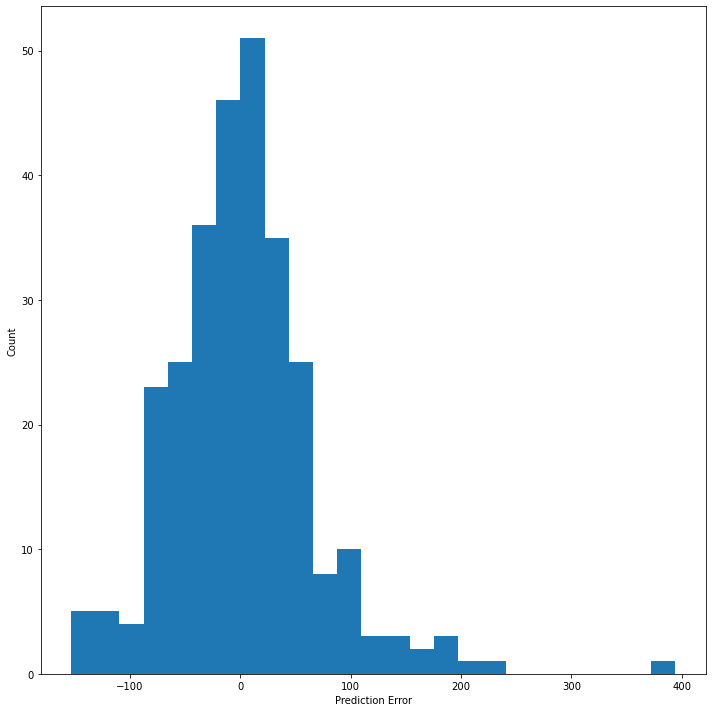

In [276]:
import matplotlib

error = y_pred - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,10)
fig.savefig('pred_error_gbr.png')

In [277]:
def evaluate_predictions(predictions, y_test, outliers):
    ratio = []
    differences = []
    for pred in range(len(y_test)):
        ratio.append((y_test[pred]/predictions[pred])-1)
        differences.append(abs(y_test[pred]- predictions[pred]))
    
    
    n_outliers = int(len(differences) * outliers)
    outliers = pd.Series(differences).astype(float).nlargest(n_outliers)
    
    return ratio, differences, outliers

In [278]:
ratio, differences, outliers = evaluate_predictions(y_pred, y_test, 0.01)

In [279]:
for index in outliers.index: 
    outliers[index] = y_pred[index]
outliers

99     655.579998
234    526.530398
dtype: float64

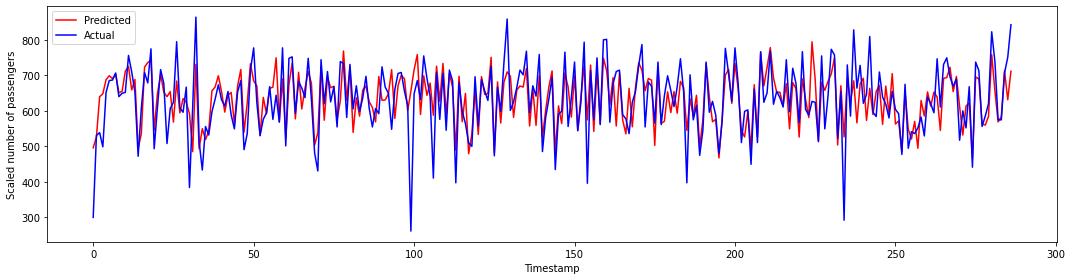

In [280]:
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(y_pred,color='red', label='Predicted')
axs.plot(y_test,color='blue', label='Actual')
#axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Scaled number of passengers')
plt.legend(loc='upper left')
plt.show()

### Simple ANN

In [281]:
from keras.layers import LSTM
from keras.models import Sequential
#from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras import models, layers
from sklearn.preprocessing import MinMaxScaler

import tensorflow_addons as tfa
import tensorflow as tf
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [282]:
model_relu1 = models.Sequential([
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='relu')])

model_relu1.compile(metrics=[tfa.metrics.RSquare()],
                 loss='mean_squared_error',
                 optimizer=tf.keras.optimizers.Adam(0.001))

In [283]:
history_r1 = model_relu1.fit(X_train, y_train, epochs=400, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/400
8/8 [==============================] - 2s 49ms/step - loss: 391658.1562 - r_square: -37.0906 - val_loss: 419726.7500 - val_r_square: -47.8819
Epoch 2/400
8/8 [==============================] - 0s 12ms/step - loss: 377826.3125 - r_square: -35.7458 - val_loss: 377310.1250 - val_r_square: -42.9420
Epoch 3/400
8/8 [==============================] - 0s 12ms/step - loss: 284478.7500 - r_square: -26.6671 - val_loss: 155735.9688 - val_r_square: -17.1372
Epoch 4/400
8/8 [==============================] - 0s 11ms/step - loss: 74956.7891 - r_square: -6.2900 - val_loss: 34792.3867 - val_r_square: -3.0520
Epoch 5/400
8/8 [==============================] - 0s 12ms/step - loss: 28662.1855 - r_square: -1.7876 - val_loss: 38418.9688 - val_r_square: -3.4743
Epoch 6/400
8/8 [==============================] - 0s 11ms/step - loss: 28553.0996 - r_square: -1.7769 - val_loss: 19760.3809 - val_r_square: -1.3013
Epoch 7/400
8/8 [==============================] - 0s 12ms/step - loss: 17569.7422 - r_s

In [288]:
y_pred_relu_tr = model_relu1.predict(X_train)
relu1_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_relu_tr))
print(relu1_rmse_train)

29/29 [==============================] - 0s 2ms/step
44.67220296893047


In [285]:
predictions_relu = model_relu1.predict(X_test)
len(predictions_relu)
#predictions_l

9/9 [==============================] - 0s 3ms/step


287

In [286]:
relu1_rmse = np.sqrt(mean_squared_error(y_test, predictions_relu))
print(relu1_rmse)

72.6125570903605


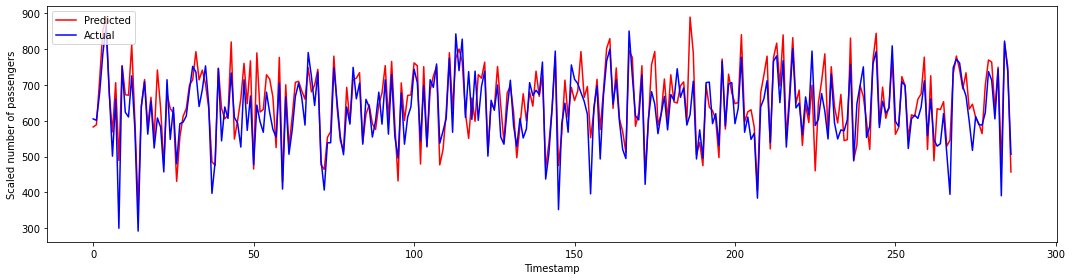

In [413]:
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions_relu,color='red', label='Predicted')
axs.plot(y_test,color='blue', label='Actual')
#axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Scaled number of passengers')
plt.legend(loc='upper left')
plt.show()

In [287]:
results = model_relu1.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 4ms/step - loss: 5272.5835 - r_square: 0.4434


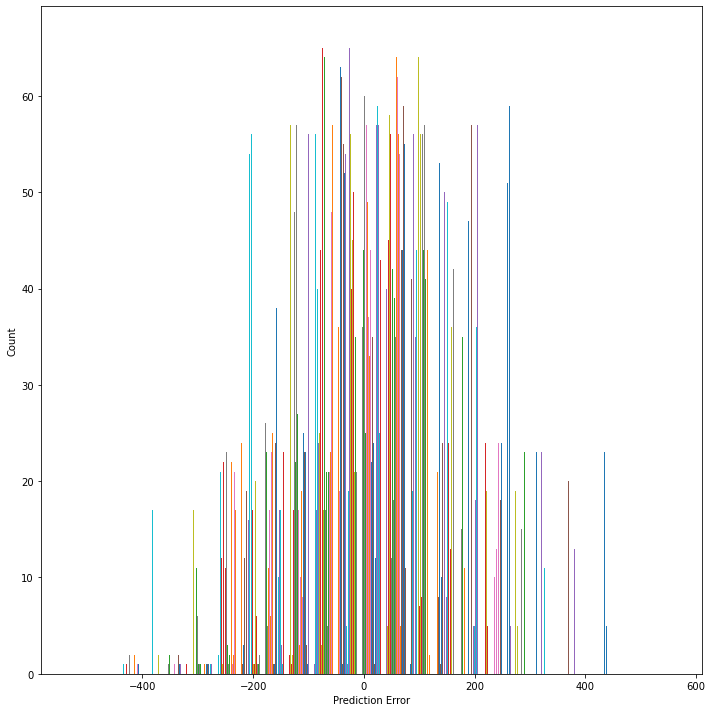

In [320]:
import matplotlib

error = predictions_relu - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,10)
fig.savefig('pred_error_relu1.png')

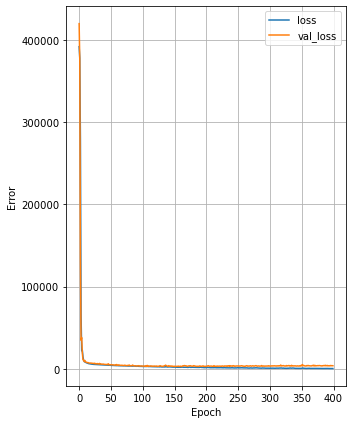

In [321]:
plot_loss(history_r1)
plt.savefig('PlotLoss_ModelRelu1.png')

## LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [290]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) 
X_train_reshaped.shape

(916, 30, 1)

In [292]:
'''seq_length = X_train.shape[0]
num_features = X_train.shape[1]

#input_shape = (seq_length, num_features)

model_lstm = tf.keras.Sequential([
    layers.LSTM(64, input_shape=(num_features, 1)),
    layers.Dense(1, activation='linear')
])
model_lstm.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=[tfa.metrics.RSquare()])

In [293]:
#history_lstm = model_lstm.fit(X_train_reshaped, y_train, batch_size=128, epochs=500)

In [294]:
'''seq_length = X_train.shape[0]
num_features = X_train.shape[1]
input_shape = (seq_length, num_features)

model_lstm = tf.keras.Sequential([
    layers.LSTM(64, input_shape=input_shape),
    layers.Dense(1, activation='linear')
])
model_lstm.compile(loss='mse', optimizer='adam', metrics=[tfa.metrics.RSquare()])

## Changing the shape of data to 3D to accomodate 8 time points for 5 features each

In [300]:
time_steps = 6
num_features = 5
samples = df_X.shape[0]

In [301]:
#X_train_rs = X_train[:samples*time_steps]
#X_train_rs = np.reshape(X_train, (samples, time_steps, num_features))

In [302]:
df_X = pd.DataFrame(X_sc)
df_X

0         1         2         3         4         5         6   \
0    -0.453394 -1.114558  1.315852 -0.647019 -1.156884 -0.915120 -0.467190   
1    -0.146211 -1.041571  1.366997 -1.206831 -1.038537  0.615373 -0.259258   
2     0.012917 -0.814373  1.235048 -0.983579 -1.403975 -0.890483 -0.210613   
3    -0.128726 -0.863284  1.344185 -1.207989 -1.941000 -0.965864 -0.429344   
4     0.455706 -0.833586  1.301384 -1.550175 -1.638518  0.111595 -0.054254   
...        ...       ...       ...       ...       ...       ...       ...   
1427  1.292526 -0.694296  0.085300  0.070252  1.150916 -0.773195  1.454364   
1428  1.152732 -0.746422  0.175350  0.059034  0.571081 -0.224036  1.298967   
1429  1.290085 -0.660370  0.091188  0.045040  0.259596  0.034854  1.440994   
1430  1.273268 -0.658241  0.131593 -0.017340  0.815052  0.245985  1.362855   
1431  0.876400 -0.707958  0.183111  0.114643  0.595369 -0.241087  1.020279   

            7         8         9   ...        20        21        22  \
0    -0.971554  1.181514 -0.324311  ...  1.316829 -0.915700 -0.391924   
1    -0.874142  1.253709 -0.990028  ...  1.232367 -1.111031 -0.026364   
2    -0.803763  1.478827 -1.278609  ...  1.749245 -1.268517 -0.618770   
3    -0.890786  1.426227 -1.115059  ...  1.462318 -0.814971 -0.675256   
4    -0.817844  1.305953 -0.641529  ...  1.280126 -0.331646 -0.157677   
...        ...       ...       ...  ...       ...       ...       ...   
1427 -0.713077 -0.020875 -0.023632  ... -0.188384 -0.389774  1.314533   
1428 -0.778784  0.110101 -0.225567  ... -0.043797 -0.480007  1.063266   
1429 -0.666851 -0.026565 -0.114877  ... -0.196349 -0.400987  0.680580   
1430 -0.671782  0.041397 -0.242208  ... -0.125857 -0.449296  1.021932   
1431 -0.738615  0.041696  0.078013  ... -0.121707 -0.306473  0.935626   

            23        24        25        26        27        28        29  
0    -0.361832  0.134009 -0.815805  1.160813 -0.763477 -0.509573 -1.119741  
1     0.823203  0.126408 -0.793194  1.180831 -1.129151 -0.223885 -0.168157  
2     0.010361  0.182520 -0.791873  1.331832 -1.321442 -0.845928 -0.989878  
3    -1.024408  0.025213 -0.849368  1.278458 -1.006951 -0.777635 -1.208612  
4    -1.078575  0.226101 -0.797131  1.197110 -0.448046 -0.662992 -1.835126  
...        ...       ...       ...       ...       ...       ...       ...  
1427  0.982503  1.409141 -0.702248  0.122504  0.171835  1.397982 -0.572173  
1428  1.276821  1.208258 -0.767089  0.243979 -0.177111  1.363294 -0.472232  
1429  0.313022  1.323714 -0.714102  0.138415  0.010560  0.988390  0.073366  
1430  1.102812  1.269366 -0.722324  0.187538 -0.145163  1.294288 -0.117775  
1431 -0.319542  0.929498 -0.747676  0.193786  0.223996  1.209726 -0.532616  

[1432 rows x 30 columns]

In [303]:
X_rs = np.zeros((samples, time_steps, num_features))

In [304]:
for i in range(num_features):
    start_col = i * time_steps
    end_col = start_col + time_steps
    X_rs[:, :, i] = df_X.iloc[:, start_col:end_col].values

In [305]:
X_rs.shape

(1432, 6, 5)

In [306]:
X_train_rsa, X_test_rs, y_train1a, y_test1 = train_test_split(X_rs, y, test_size = 0.2, random_state = 1)

print(X_train_rsa.shape, X_test_rs.shape, y_train1a.shape, y_test1.shape)

(1145, 6, 5) (287, 6, 5) (1145,) (287,)


In [307]:
X_train_rs, X_val_rs, y_train1, y_val1 = train_test_split(X_train_rsa, y_train1a, test_size = 0.2, random_state = 5)

print(X_train_rs.shape, X_val_rs.shape, y_train1.shape, y_val1.shape)

(916, 6, 5) (229, 6, 5) (916,) (229,)


In [308]:
#samples_test = X_test.shape[0]
#X_test_rs = X_test[:samples_test*time_steps]
#X_test_rs = np.reshape(X_test, (samples_test, time_steps, num_features))
#X_test_rs.shape

In [143]:
model_lstm2 = tf.keras.Sequential([
    layers.LSTM(256, input_shape=(X_train_rs.shape[1], X_train_rs.shape[2]), return_sequences=True),
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(1, activation='linear')
])

In [362]:
model_lstm2.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1), metrics=[tfa.metrics.RSquare()])
 

In [363]:
history_lstm2 = model_lstm2.fit(X_train_rs, y_train1, batch_size=64 , epochs=400, validation_data=(X_val_rs, y_val1))

Epoch 1/400
15/15 [==============================] - 15s 260ms/step - loss: 297437.4062 - r_square: -27.9273 - val_loss: 204674.0156 - val_r_square: -22.8370
Epoch 2/400
15/15 [==============================] - 1s 82ms/step - loss: 119642.0625 - r_square: -10.6358 - val_loss: 70303.4297 - val_r_square: -7.1878
Epoch 3/400
15/15 [==============================] - 1s 82ms/step - loss: 35886.5547 - r_square: -2.4902 - val_loss: 20477.9199 - val_r_square: -1.3849
Epoch 4/400
15/15 [==============================] - 1s 82ms/step - loss: 12632.9150 - r_square: -0.2286 - val_loss: 9855.5713 - val_r_square: -0.1478
Epoch 5/400
15/15 [==============================] - 1s 78ms/step - loss: 10386.1318 - r_square: -0.0101 - val_loss: 8739.8574 - val_r_square: -0.0179
Epoch 6/400
15/15 [==============================] - 1s 78ms/step - loss: 10496.2041 - r_square: -0.0208 - val_loss: 8828.1875 - val_r_square: -0.0282
Epoch 7/400
15/15 [==============================] - 1s 78ms/step - loss: 10358.049

In [364]:
y_pred_lstm2_tr = model_lstm2.predict(X_train_rs)
lstm2_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lstm2_tr))
print(lstm2_rmse_train)

29/29 [==============================] - 3s 21ms/step
102.05035054944335


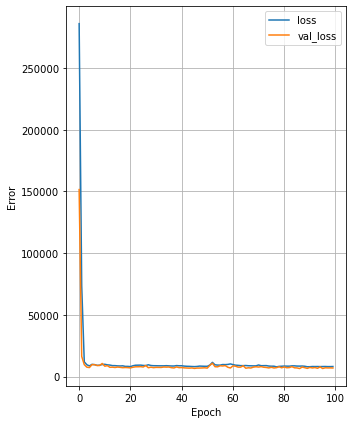

In [354]:
plot_loss(history_lstm2)
plt.savefig('PlotLoss_lstm2.png')

## ---------- Bidirectional LSTM ------------

In [309]:
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

model_bd = Sequential()
model_bd.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(6,5)))
model_bd.add(Bidirectional(LSTM(64, activation='relu')))
model_bd.add(Dense(1, activation='linear'))

model_bd.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=[tfa.metrics.RSquare()])


history_bd = model_bd.fit(X_train_rs, y_train1, epochs=500, batch_size=350, validation_data=(X_val_rs, y_val1))

#history_bd = model_bd.fit(X_train_rs, y_train1, epochs=500, batch_size=128)

Epoch 1/500
3/3 [==============================] - 9s 507ms/step - loss: 391262.1250 - r_square: -37.0525 - val_loss: 390632.4062 - val_r_square: -44.4939
Epoch 2/500
3/3 [==============================] - 0s 70ms/step - loss: 620576.4375 - r_square: -59.3542 - val_loss: 141634.3906 - val_r_square: -15.4950
Epoch 3/500
3/3 [==============================] - 0s 68ms/step - loss: 227420.7656 - r_square: -21.1179 - val_loss: 395528.8438 - val_r_square: -45.0641
Epoch 4/500
3/3 [==============================] - 0s 70ms/step - loss: 371431.9375 - r_square: -35.1237 - val_loss: 416876.5000 - val_r_square: -47.5503
Epoch 5/500
3/3 [==============================] - 0s 69ms/step - loss: 385962.4688 - r_square: -36.5375 - val_loss: 420849.2812 - val_r_square: -48.0130
Epoch 6/500
3/3 [==============================] - 0s 67ms/step - loss: 388963.3125 - r_square: -36.8288 - val_loss: 421996.9688 - val_r_square: -48.1467
Epoch 7/500
3/3 [==============================] - 0s 67ms/step - loss: 389

In [312]:
y_pred_bd_tr = model_bd.predict(X_train_rs)
bd_rmse_train = np.sqrt(mean_squared_error(y_train1, y_pred_bd_tr))
print(bd_rmse_train)

29/29 [==============================] - 0s 5ms/step
51.76553676949517


In [313]:
results_bd = model_bd.evaluate(X_test_rs, y_test1, batch_size=128)


3/3 [==============================] - 0s 2ms/step - loss: 3981.6562 - r_square: 0.5797


In [314]:
y_pred_bd = model_bd.predict(X_test_rs)
bd_rmse = np.sqrt(mean_squared_error(y_test1, y_pred_bd))
print(bd_rmse)

9/9 [==============================] - 0s 7ms/step
63.100363603384885


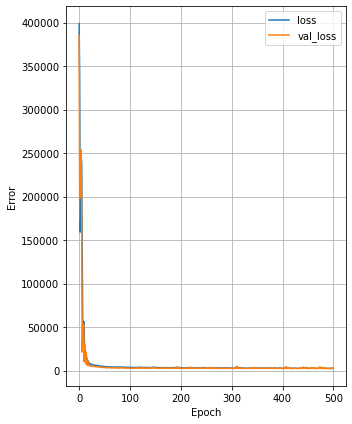

In [155]:
plot_loss(history_bd)
plt.savefig('PlotLoss_BD.png')

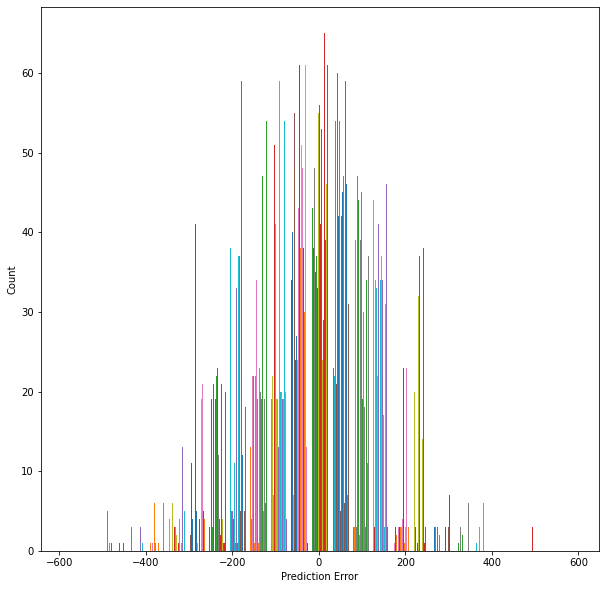

In [213]:
error = y_pred_bd - y_test1
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,10)
fig.savefig('pred_error_bd.png')

## ------------- Bidirectional LSTM with Dropout ---------------

In [381]:
from tensorflow.keras import regularizers

model_bd2 = Sequential()
model_bd2.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True, kernel_regularizer=regularizers.l2(0.01)), input_shape=(10, 5)))
model_bd2.add(Dropout(0.2))
model_bd2.add(Bidirectional(LSTM(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))))
model_bd2.add(Dropout(0.2))
model_bd2.add(Dense(1, activation='linear'))

model_bd2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=[tfa.metrics.RSquare()])


history_bd2 = model_bd2.fit(X_train_rs, y_train1, epochs=500, batch_size=350, validation_data=(X_val_rs, y_val1))

Epoch 1/500
3/3 [==============================] - 9s 538ms/step - loss: 390087.0625 - r_square: -36.9377 - val_loss: 137962.4062 - val_r_square: -15.0670
Epoch 2/500
3/3 [==============================] - 0s 104ms/step - loss: 14451583.0000 - r_square: -1404.4949 - val_loss: 396591.1562 - val_r_square: -45.1874
Epoch 3/500
3/3 [==============================] - 0s 113ms/step - loss: 379205.0938 - r_square: -35.8792 - val_loss: 423854.6250 - val_r_square: -48.3626
Epoch 4/500
3/3 [==============================] - 0s 105ms/step - loss: 391966.0312 - r_square: -37.1203 - val_loss: 424813.5625 - val_r_square: -48.4743
Epoch 5/500
3/3 [==============================] - 0s 106ms/step - loss: 392592.2812 - r_square: -37.1811 - val_loss: 425020.1562 - val_r_square: -48.4983
Epoch 6/500
3/3 [==============================] - 0s 106ms/step - loss: 392743.6875 - r_square: -37.1966 - val_loss: 425078.6250 - val_r_square: -48.5051
Epoch 7/500
3/3 [==============================] - 0s 107ms/step -

In [382]:
y_pred_bd2_tr = model_bd2.predict(X_train_rs)
bd2_rmse_train = np.sqrt(mean_squared_error(y_train1, y_pred_bd2_tr))
print(bd2_rmse_train)

29/29 [==============================] - 1s 7ms/step
59.506121402854866


## ------------ GRU (Gated Recurrent Unit) ----------

In [383]:
#Another Type of RNN similar to LSTM

from tensorflow.keras.layers import GRU, Dense

model_gru = Sequential()
model_gru.add(GRU(64, activation='relu', input_shape=(10, 5)))
model_gru.add(Dense(1, activation='linear'))

model_gru.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=[tfa.metrics.RSquare()])


history_gru = model_gru.fit(X_train_rs, y_train1, epochs=400, batch_size=128, validation_data=(X_val_rs, y_val1))

Epoch 1/400
8/8 [==============================] - 3s 69ms/step - loss: 2215788800.0000 - r_square: -215495.7812 - val_loss: 425337.4375 - val_r_square: -48.5353
Epoch 2/400
8/8 [==============================] - 0s 17ms/step - loss: 393536.6875 - r_square: -37.2736 - val_loss: 426554.5625 - val_r_square: -48.6771
Epoch 3/400
8/8 [==============================] - 0s 19ms/step - loss: 394395.7812 - r_square: -37.3569 - val_loss: 426915.3750 - val_r_square: -48.7191
Epoch 4/400
8/8 [==============================] - 0s 16ms/step - loss: 393988.1875 - r_square: -37.3176 - val_loss: 421965.5000 - val_r_square: -48.1426
Epoch 5/400
8/8 [==============================] - 0s 18ms/step - loss: 335288.5000 - r_square: -31.6085 - val_loss: 190813.0781 - val_r_square: -21.2223
Epoch 6/400
8/8 [==============================] - 0s 16ms/step - loss: 158354.8438 - r_square: -14.4008 - val_loss: 158651.4219 - val_r_square: -17.4767
Epoch 7/400
8/8 [==============================] - 0s 17ms/step - lo

In [384]:
y_pred_gru_tr = model_gru.predict(X_train_rs)
gru_rmse_train = np.sqrt(mean_squared_error(y_train1, y_pred_gru_tr))
print(gru_rmse_train)

29/29 [==============================] - 0s 3ms/step
108.20584339781315


In [550]:
## ------------- GRU with more layers, Batch Normalization and Dropout -------------

In [221]:
from tensorflow.keras.layers import Dense, Dropout, GRU, BatchNormalization

model_gru2 = Sequential()

model_gru2.add(GRU(128, input_shape=(10, 5), return_sequences=True))
model_gru2.add(BatchNormalization())
model_gru2.add(Dropout(0.2))
model_gru2.add(GRU(64, return_sequences=True))
model_gru2.add(BatchNormalization())
model_gru2.add(Dropout(0.2))
model_gru2.add(GRU(32))
model_gru2.add(BatchNormalization())
model_gru2.add(Dropout(0.2))
model_gru2.add(Dense(1, activation='linear'))

model_gru2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=[tfa.metrics.RSquare()])


history_gru2 = model_gru2.fit(X_train_rs, y_train1, epochs=400, batch_size=128, validation_data=(X_val_rs, y_val1))

Epoch 1/400
8/8 [==============================] - 14s 528ms/step - loss: 393061.7500 - r_square: -35.7987 - val_loss: 348800.1250 - val_r_square: -42.6762
Epoch 2/400
8/8 [==============================] - 1s 71ms/step - loss: 350561.5312 - r_square: -31.8199 - val_loss: 270866.5000 - val_r_square: -32.9174
Epoch 3/400
8/8 [==============================] - 1s 63ms/step - loss: 259056.7812 - r_square: -23.2532 - val_loss: 184746.2812 - val_r_square: -22.1336
Epoch 4/400
8/8 [==============================] - 0s 56ms/step - loss: 139109.3125 - r_square: -12.0235 - val_loss: 59098.7227 - val_r_square: -6.4002
Epoch 5/400
8/8 [==============================] - 1s 70ms/step - loss: 39230.9180 - r_square: -2.6728 - val_loss: 6619.4355 - val_r_square: 0.1711
Epoch 6/400
8/8 [==============================] - 0s 60ms/step - loss: 14189.5283 - r_square: -0.3284 - val_loss: 22029.9004 - val_r_square: -1.7585
Epoch 7/400
8/8 [==============================] - 0s 54ms/step - loss: 20625.5723 - r

In [226]:
y_pred_gru2_tr = model_gru2.predict(X_train_rs)
gru2_rmse_train = np.sqrt(mean_squared_error(y_train1, y_pred_gru2_tr))
print(gru2_rmse_train)

29/29 [==============================] - 0s 8ms/step
93.43407170017078
